(Click on the below links to navigate to different sections of the notebook)
# **Overview**  
- <a href="#1"> 1. Importing Data</a>
- <a href="#2"> 2. Preprocessing the Dataset</a>
- <a href="#3"> 3. Explanatory Data Analysis </a>
- <a href="#4"> 4. Divide the data into training and testing data </a>
- <a href="#5"> 5. Model</a>
- <a href="#6"> 6. Final prediction and Conclusion</a>



In [1133]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 

import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## <a id="1"> 1. Importing Data </a>

In [1134]:
df2 = pd.read_csv('OLX_Car_Data_CSV.csv',encoding= 'latin1')
df2 = df2.sample(frac=1).reset_index(drop=True)# shuffle
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 24973 rows and 9 columns


In [1135]:
display(df2.head(5))
df2.columns

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Suzuki,Used,CNG,46000.0,Mehran VXR,625000,Karachi,Cash,2015.0
1,Suzuki,Used,CNG,9999250.0,Mehran VX,125000,Karachi,Cash,1990.0
2,Daihatsu,New,Petrol,119000.0,Hijet,865000,NaN,Cash,2013.0
3,Suzuki,Used,Petrol,62000.0,Cultus VXR,550000,Lahore,Cash,2005.0
4,NaN,NaN,NaN,NaN,NaN,265000,NaN,NaN,NaN


Index(['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model', 'Price',
       'Registered City', 'Transaction Type', 'Year'],
      dtype='object')

## <a id="2" > 2. Preprocessing the Dataset</a>

Checking values of categorical attributes

In [1136]:
cat_val = ['Brand', 'Condition', 'Fuel', 'Model',
       'Registered City', 'Transaction Type']

for col in cat_val:
    print ([col]," : ",df2[col].unique())

['Brand']  :  ['Suzuki' 'Daihatsu' nan 'Honda' 'Nissan' 'Mitsubishi' 'Toyota' 'KIA'
 'Other Brands' 'Hyundai' 'Mazda' 'Subaru' 'FAW' 'Daewoo' 'Lexus'
 'Mercedes' 'BMW' 'Changan' 'Chevrolet' 'Audi' 'Range Rover'
 'Classic & Antiques' 'Porsche' 'Land Rover']
['Condition']  :  ['Used' 'New' nan]
['Fuel']  :  ['CNG' 'Petrol' nan 'Diesel' 'Hybrid' 'LPG']
['Model']  :  ['Mehran VXR' 'Mehran VX' 'Hijet' 'Cultus VXR' nan 'City IVTEC'
 'City IDSI' 'Esse' '120 Y' 'Baleno' 'Lancer' 'Move' 'Mira' 'Passo' 'Dayz'
 'FX' 'Atrai Wagon' 'BR-V' 'Cultus VXL' 'Aqua' 'Pajero Mini' 'Every Wagon'
 'Corolla 2.0 D' 'Corolla XE' 'Hilux' 'Corolla XLI' 'Alto' 'Civic EXi'
 'Corolla GLI' 'Khyber' 'Swift' 'Civic VTi Oriel Prosmatec' 'Premio'
 'Vitz' 'Bolan' 'Wagon R Stingray' 'Wagon R' 'Charade' 'Sunny' 'Prado'
 'Every' '86' 'Grace Hybrid' 'Civic VTi' 'MR Wagon' 'Margalla'
 'Civic Prosmetic' 'Civic VTi Oriel' 'Spectra' 'Other' 'Prius' 'Carry'
 'Santro' 'Clipper' 'Camry' 'Corrolla Altis' 'Ravi' 'Bluebird Sylphy'
 'Pix

### <a id="2-1" > 2.1 Check for NULLS</a>

Visual display of null values in each columns for quick overview

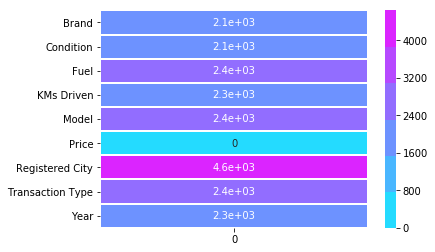

In [1137]:
sns.heatmap(pd.DataFrame(df2.isnull().sum()),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")


In [1138]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64


There are too many missing values in the dataset. So instead of removing them <br>we will fill it median, average or most frequent
data.<br>
We will consider "NaN" as some data point. So let's replace it with word "unknown" <br>to treat it as a categorical 
value in its respective columns.

**Replace the NaN-Values with dummies <br>Replacing "NaN" with "unknown" to treat it as a categorical values in their respective columns**

In [1139]:
#Train dataset
df2['Brand'].fillna(value='unknown', inplace=True)
df2['Condition'].fillna(value='unknown', inplace=True)
df2['Fuel'].fillna(value='unknown', inplace=True)
df2['Model'].fillna(value='unknown', inplace=True)
df2['Registered City'].fillna(value='unknown', inplace=True)
df2['Transaction Type'].fillna(value='unknown', inplace=True)

In [1140]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand                  0
Condition              0
Fuel                   0
KMs Driven          2286
Model                  0
Price                  0
Registered City        0
Transaction Type       0
Year                2284
dtype: int64


Let's now fill the missing values in the column "KMs Driven" with average values.

#### Filling the missing data

In [1141]:
#Train dataset
df2['KMs Driven'].fillna((df2['KMs Driven'].mean()),inplace = True) #average data 
# df2['Year'].fillna(df2['Year'].value_counts().index[0],inplace = True) #most frequent data

In [1142]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

Brand                  0
Condition              0
Fuel                   0
KMs Driven             0
Model                  0
Price                  0
Registered City        0
Transaction Type       0
Year                2284
dtype: int64


In [1143]:
df2=df2.dropna() #drop rows with atleast a column with missing values


In [1144]:
print("Train : ", df2.shape)

Train :  (22689, 9)


### <a id="2-2" > 2.2 Check the datatype of columns</a>

In [1145]:
df2.dtypes

Brand                object
Condition            object
Fuel                 object
KMs Driven          float64
Model                object
Price                 int64
Registered City      object
Transaction Type     object
Year                float64
dtype: object

In [1146]:
#Train dataset
df2.describe()

,KMs Driven,Price,Year
count,2.268900e+04,2.268900e+04,22689.000000
mean,1.278112e+05,9.212113e+05,2005.901626
std,5.996462e+05,1.593948e+06,9.563804
min,1.000000e+00,5.000000e+04,1915.000000
25%,1.600000e+04,3.800000e+05,2002.000000
50%,6.659200e+04,6.550000e+05,2008.000000
75%,1.000000e+05,1.150000e+06,2013.000000
max,1.000000e+07,8.765432e+07,2020.000000


### <a id="2-3" > 2.3 Remove Outliers</a>

#### Distribution of "Price" in train dataset

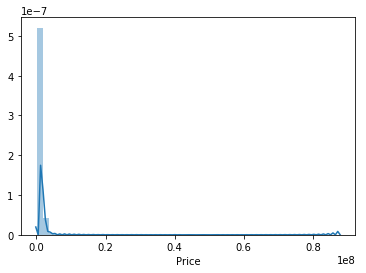

In [1147]:
sns.distplot(df2["Price"])

#### Distribution of "KMs Driven" in train dataset

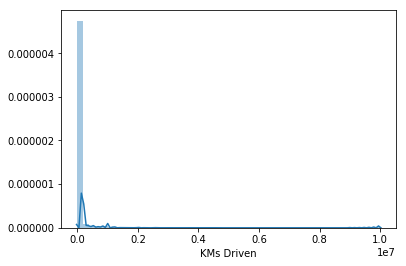

In [1148]:
sns.distplot(df2["KMs Driven"])

#### Distribution of "Year" in train dataset

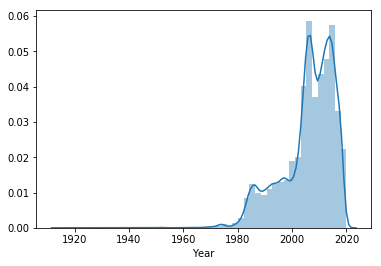

In [1149]:
sns.distplot(df2["Year"])

Determine outliers in dataset

In [1150]:
cols=['Price']


for i in cols:
    quartile_1,quartile_3 = np.percentile(df2[i],[25,75])
    quartile_f,quartile_l = np.percentile(df2[i],[1,99])
    IQR = quartile_3-quartile_1
    lower_bound = quartile_1 - (1.5*IQR)
    upper_bound = quartile_3 + (1.5*IQR)
    print(i,lower_bound,upper_bound,quartile_f,quartile_l)

    df2[i].loc[df2[i] < lower_bound] = quartile_f
    df2[i].loc[df2[i] > upper_bound] = quartile_l


Price -775000.0 2305000.0 95000.0 4536799.999999985


In [1151]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df2=remove_outlier(df2, 'Price')
# df2=remove_outlier(df2, 'KMs Driven')
# df2=remove_outlier(df2, 'Year')

#### After removing outlier in 'Price'

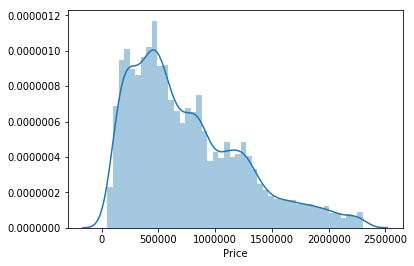

In [1152]:
sns.distplot(df2["Price"])

## <a id="3">3. Explanatory Data Analysis </a>

### <a id="3-1" > 3.1 Distribution of "KMs Driven", "Price", "Year" in train dataset<a>

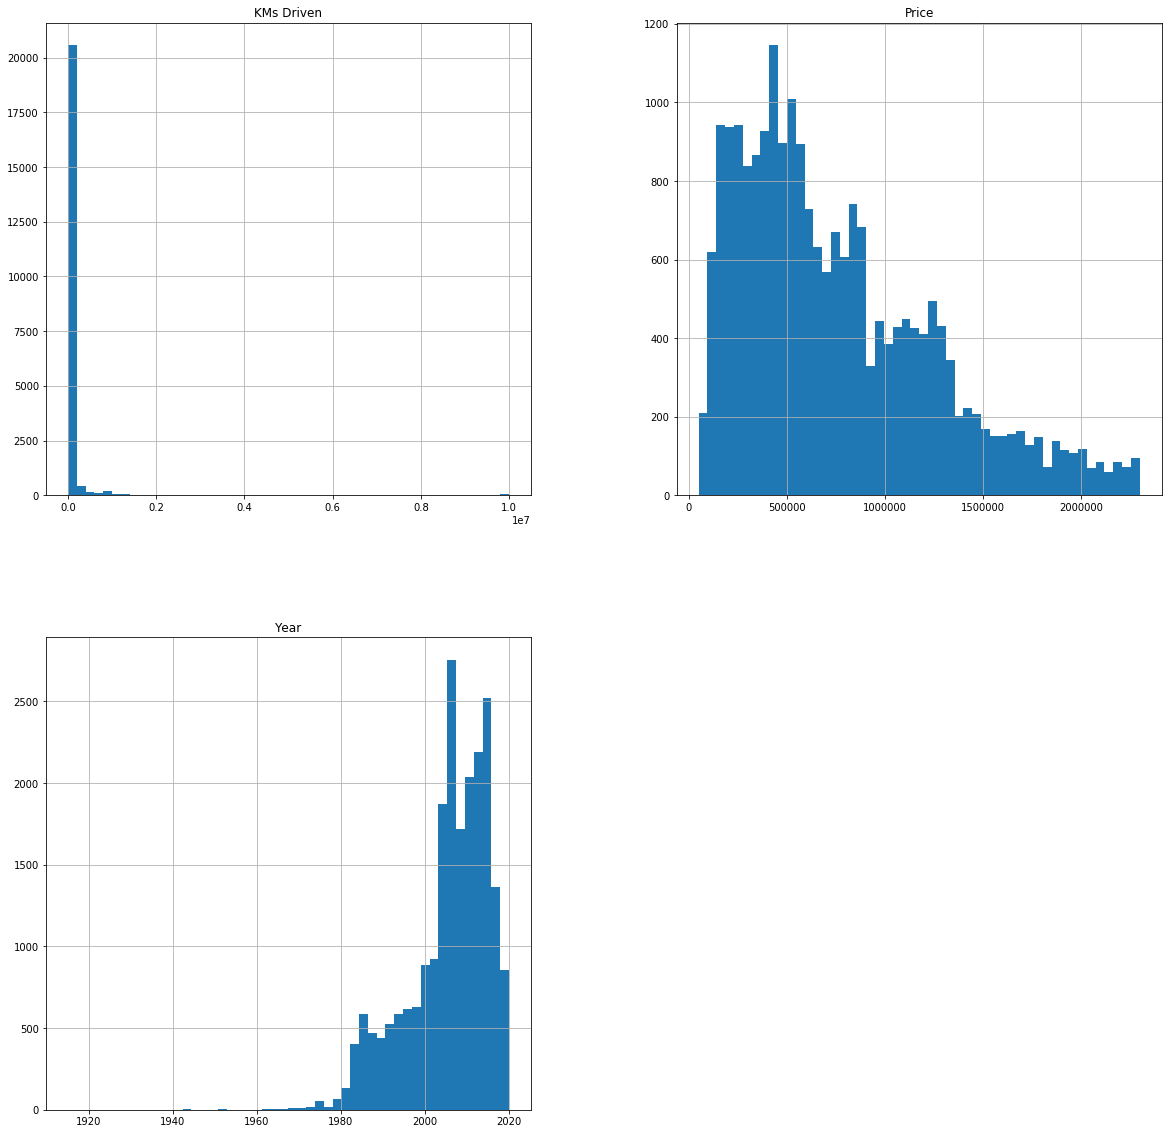

In [1153]:
#Train Dataset
df2.hist(bins = 50 , figsize = (20,20))
plt.show()

### <a id="3-2" > 3.2 Pairplot of different features with "Price"</a>

Pairplot to visualize the realtionship between the target and independent features

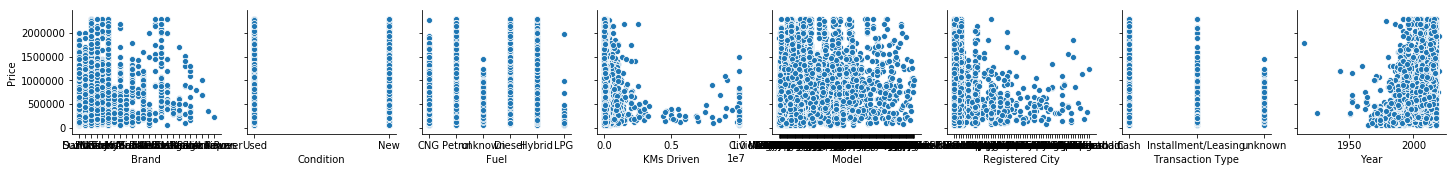

In [1154]:

sns.pairplot(df2, x_vars=['Brand', 'Condition', 'Fuel', 'KMs Driven', 'Model',
       'Registered City', 'Transaction Type', 'Year'], y_vars=["Price"],aspect=1);


It can be observed that there is some linear relationship (rougly) between dependent variable "Price"
and independent variables "Brand", "KMs Driven", "Registered City" and "Year" .

So let's draw these plots separately for clear view.

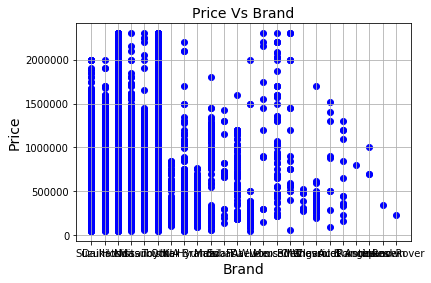

In [1155]:
plt.scatter(df2['Brand'], df2['Price'], color='blue')
plt.title('Price Vs Brand', fontsize=14)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

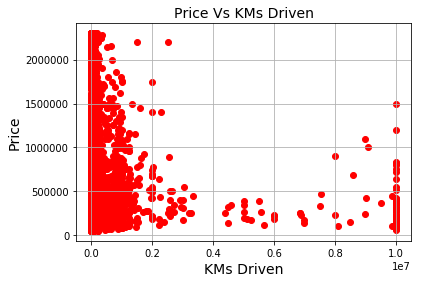

In [1156]:
plt.scatter(df2['KMs Driven'], df2['Price'], color='red')
plt.title('Price Vs KMs Driven', fontsize=14)
plt.xlabel('KMs Driven', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

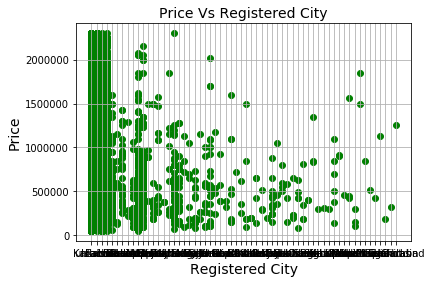

In [1157]:
plt.scatter(df2['Registered City'], df2['Price'], color='green')
plt.title('Price Vs Registered City', fontsize=14)
plt.xlabel('Registered City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

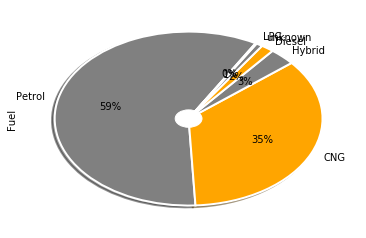

In [1158]:
df2[df2["Condition"] == "Used"]["Fuel"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["grey","orange"],startangle = 60,                                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.1,color="white")
plt.gca().add_artist(circ) 


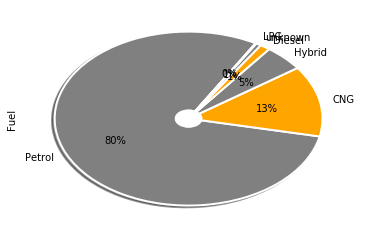

In [1159]:
df2[df2["Condition"] == "New"]["Fuel"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["grey","orange"],startangle = 60,                                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.1,color="white")
plt.gca().add_artist(circ) 


We can observe that new car uses CNG less than old car.

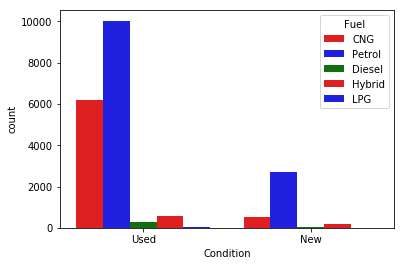

In [1160]:
ax = sns.countplot("Condition",hue="Fuel",data=df2[df2["Transaction Type"] == "Cash"],palette=["r","b","g"])
ax.set_facecolor("white")

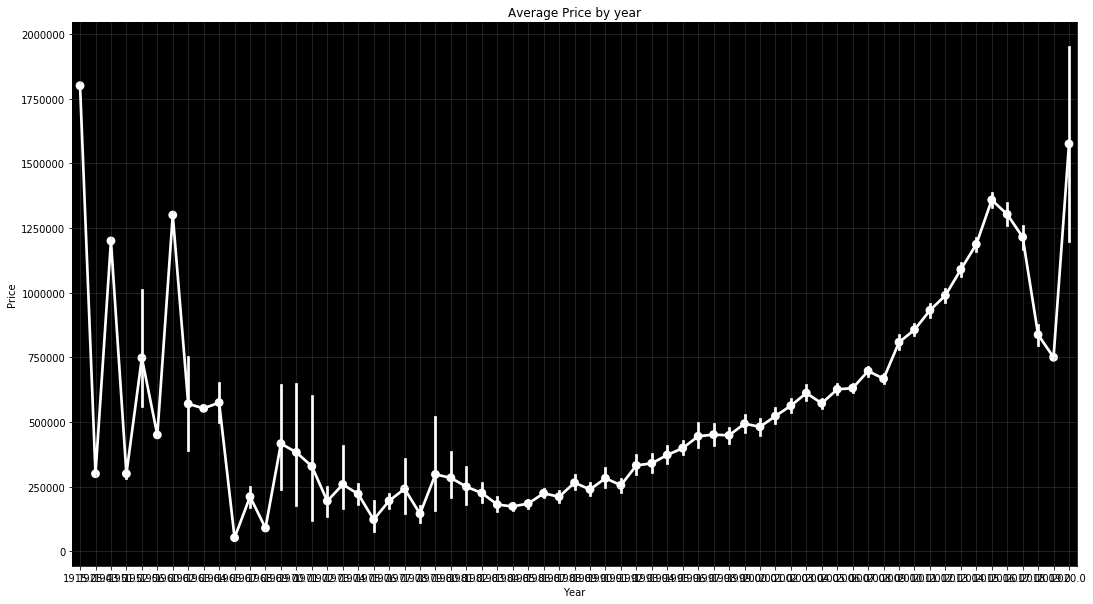

In [1161]:
plt.figure(figsize=(18,10))
ax = sns.pointplot(df2["Year"],df2["Price"],color="w") # line is of white color
ax.set_facecolor("k") #background is black
plt.grid(True,color="grey",alpha=.3) # grid is on and its color is grey
plt.title("Average Price by year")
plt.show()

### <a id="3-2" > 3.2 Encoding the categorical data (one hot Encoding)</a>

In [1162]:
# df2=df2.drop(['Transaction Type','Registered City'], axis=1)
# test=test.drop(['Transaction Type','Registered City'], axis=1)

In [1163]:
df3=pd.get_dummies(df2,drop_first=True)
df3.head()

,KMs Driven,Price,Year,Brand_BMW,Brand_Changan,Brand_Chevrolet,Brand_Classic & Antiques,Brand_Daewoo,Brand_Daihatsu,Brand_FAW,...,Registered City_Sialkot,Registered City_Sukkar,Registered City_Sukkur,Registered City_Swabi,Registered City_Tank,Registered City_Vehari,Registered City_Wah,Registered City_unknown,Transaction Type_Installment/Leasing,Transaction Type_unknown
0,46000.0,625000.0,2015.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9999250.0,125000.0,1990.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,119000.0,865000.0,2013.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,62000.0,550000.0,2005.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,80000.0,1200000.0,2010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <a id="4"> 4.  Divide the data into training and test data </a>

In [1164]:
df_y = df3['Price'].values
df_X = df3.drop(['Price'], axis=1)


In [1165]:
test_size = 0.30

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_y, test_size=test_size,shuffle=True, random_state = 3)


X_test.to_csv("cleaned_test_set.tsv", sep='\t', encoding='utf-8',index=False)

temp2 = pd.DataFrame(data=Y_test.flatten())
temp2.columns = temp2.iloc[0]
temp2 = temp2.reindex(temp2.index.drop(0)).reset_index(drop=True)
temp2.columns.name = None
temp2.to_csv("actual_price_test.tsv", sep='\t', encoding='utf-8',index=False)


## <a id="5"> 5. Model</a>

## Random forest Regressor

In [1166]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

### Grid searching of hyperparameters

In [1167]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.6s finished


In [1168]:
print(gs.best_score_)
print(gs.best_params_)
 

0.8411323977630158
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [1169]:
bp = gs.best_params_
rf_regressor = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
rf_regressor.fit(X_train, Y_train)

print("Train R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_train, Y_train))


Train R^2 Score:
Score: 0.88


### K Fold cross validation

Now we will do cross validation . This is because we split dataset in train and test. It may happen that test and train does not have uniform distribution of samples. So to make sure our model doesn't overfit i.e to generalize it we will do cross validation.

In [1170]:
#Predicting the Price using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X_train, Y_train, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(Y_train, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: %.2f '% accuracy_rf)

Cross-Predicted(KFold) Random Forest Regression Accuracy: 0.86 


In [1171]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [1172]:
scores = cross_val_score(rf_regressor, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [198785.40335682 204733.32140927 178032.42358956 189915.89564232
 195901.83080556]
Mean: 193473.77496070514
Standard deviation: 9077.225072044435


In [1173]:
print("Test R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_test, Y_test))

Test R^2 Score:
Score: 0.85


#### Comparison of first five predicted and actual price in train_set

In [ ]:
y_pred[0:5]

In [ ]:
list(Y_train[0:5])

In [1174]:
# The mean squared error
y_pred =rf_regressor.predict(X_train)

forest_mse = mean_squared_error(Y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)

print("Root Mean squared error (training): %.2f"
      % forest_rmse)

Root Mean squared error (training): 170965.07


Let's find what features are most important

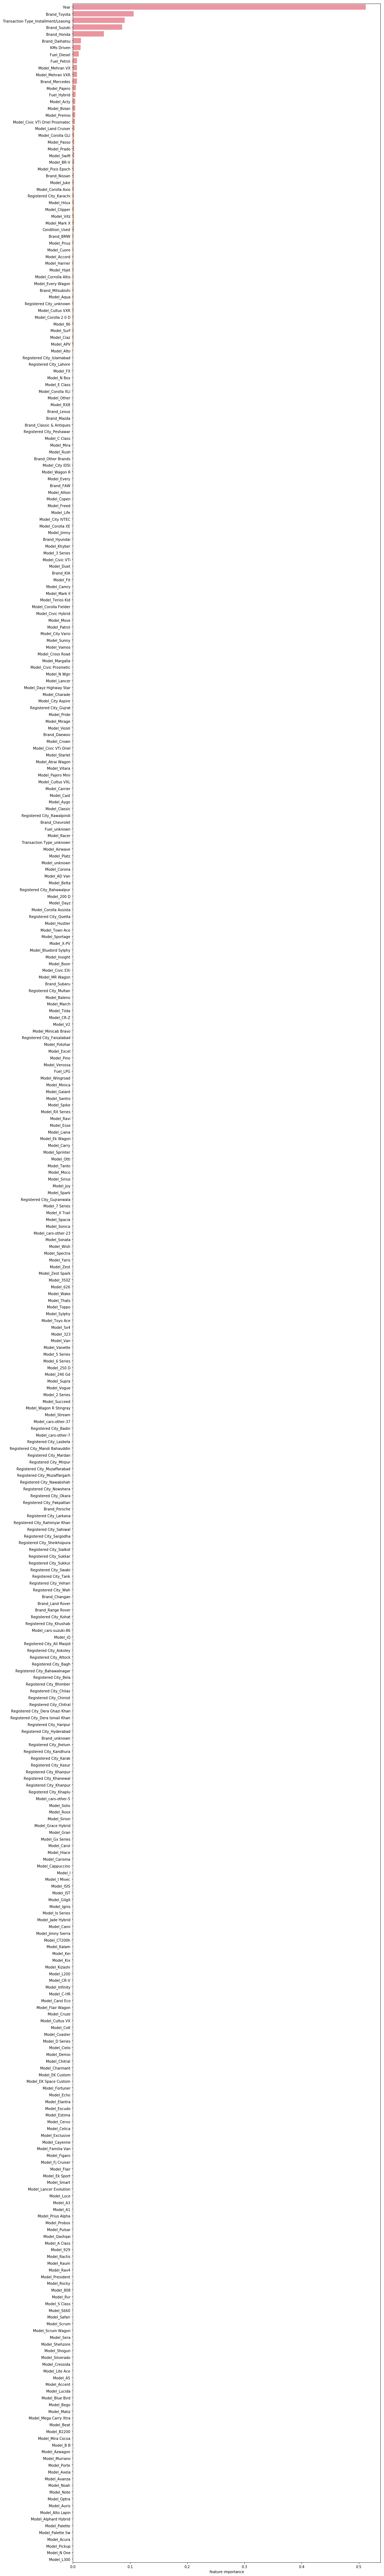

In [1175]:
ranking = np.argsort(-rf_regressor.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf_regressor.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

Keeping 30 most dominant features

In [1176]:

X_train1 = X_train.iloc[:,ranking[:30]]
X_test1 = X_test.iloc[:,ranking[:30]]


### Correlation Matrix

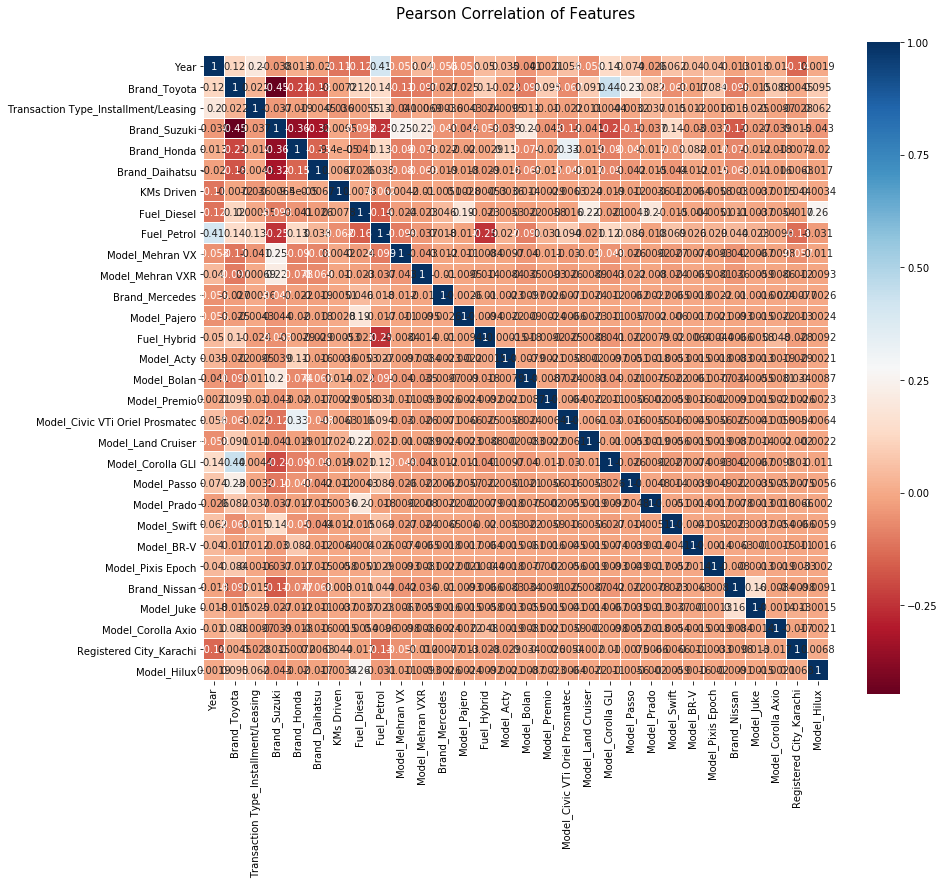

In [1177]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into our learning model because this means that there isn't much redundant or superfluous data in our training set. Here are two most correlated features are that of "Brand_Toyata" and "Model_Corolla_GLI".

Let's run the Linear Regression to check if removing the less dominant features improved the model from earlier version.

## Linear Regression

In [1178]:
regr = LinearRegression()

regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1179]:
print('Train R^2 \nscore: %.2f' % regr.score(X_train, Y_train))

Train R^2 
score: 0.82


In [1180]:
# The mean squared error
y_pred =regr.predict(X_train)

lin_mse = mean_squared_error(Y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)

print("Mean squared error (training): %.2f"
      % lin_rmse)


Mean squared error (training): 213073.66


#### K-Fold Cross Validation

In [1181]:
#Predicting the Price using cross validation (KFold method)
y_pred_kf = cross_val_predict(regr, X_train, Y_train, cv=10 )

#Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(Y_train, y_pred_kf)
print('Cross-Predicted(KFold) Linear Regression Accuracy: %.2f' % accuracy_lf)


Cross-Predicted(KFold) Linear Regression Accuracy: 0.80


In [1182]:
scores = cross_val_score(regr, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [224062.23393034 231701.81544356 217004.20600158 229034.29232788
 225559.18120589]
Mean: 225472.3457818493
Standard deviation: 5003.980468101041


In [1183]:
#intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

Intercept: 
 -52950720.67589381
Coefficients: 
 [-4.56408638e-03  2.69935060e+04  1.73170914e+05 -5.67642725e+05
 -5.57858817e+05  8.74453538e+05  4.16209972e+05 -1.88273209e+05
 -4.03501798e+05 -1.27668741e+05 -3.48771733e+05 -2.91886287e+05
 -2.70745904e+05  9.31211061e+05 -5.87319927e+04 -2.35863507e+05
 -6.25202084e+05 -1.90214524e+05 -1.79092937e+05  2.39239954e+05
 -2.14730268e+05 -2.20355202e+05 -2.67583792e+05  1.21130258e+05
 -2.01576550e+05 -6.19899783e+04  1.92893553e+05  7.41400177e+04
  1.21295510e+05  8.09452177e+04 -9.57028352e+04 -2.90439301e+05
  3.62871360e+05 -1.44688427e+03  1.48698804e-04 -1.34608451e+05
 -2.85357582e+05  4.50965700e+05  5.65932131e+05 -8.46994958e+04
 -2.85261379e+05  1.08537754e+06 -4.97240970e+04 -3.72236759e+05
 -2.71772396e+05  4.74216172e+05 -2.20675685e+05 -1.65399735e+05
  4.46343431e+05 -1.73594831e+05  7.33042090e+04 -1.70057913e+05
 -2.56837422e+03 -5.12413561e+05 -4.52573948e+05  1.66593375e+05
  2.31685044e+05  2.13208970e+04 -3.212612

#### Comparison of first five predicted and actual price in train_set

In [1184]:
y_pred[0:5]

array([723788.69608975, 388253.36711191, 199954.14108735, 487942.26287424])

In [1185]:
list(Y_train[0:5])

[760000.0, 240000.0, 140000.0, 470000.0]

### Scatter Plot of Predicted Price Vs Actual Price

Text(0,0.5,'Predictions')

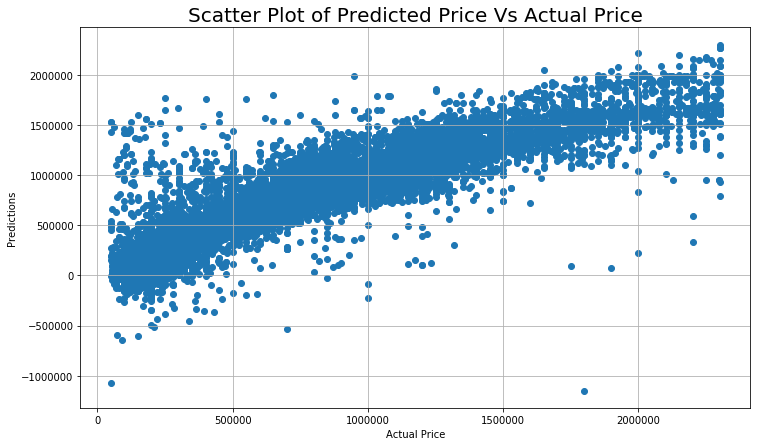

In [1186]:
y_pred = regr.predict(X_train)
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title('Scatter Plot of Predicted Price Vs Actual Price', y=1, size=20)
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predictions")

### Residual Plot

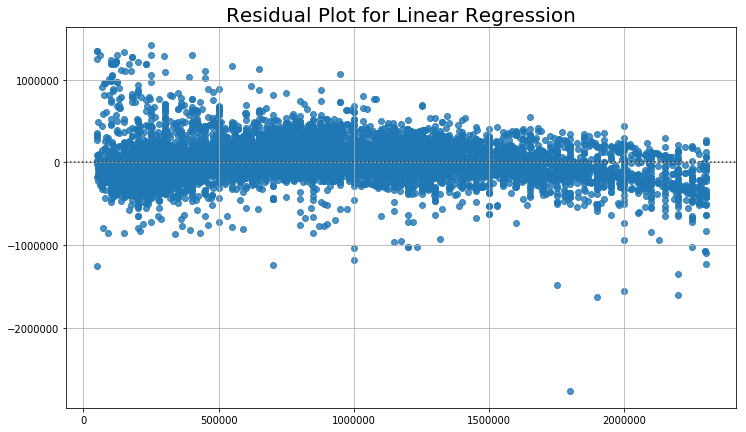

In [1187]:
plt.figure(figsize=(12,7)) 
plt.grid(True)
plt.title('Residual Plot for Linear Regression', y=1, size=20) 
sns.residplot(Y_train,y_pred) # regression Residual Plot for linear regression model using bootstrapping

In [1188]:
print('Test R^2 \nscore: %.2f' % regr.score(X_test, Y_test))

Test R^2 
score: 0.80


**Train and Cross Validation score is quite comparable. So we can say that our model in not overfitting. <br>It is generalizing better.**

## <a id="6"> 6. Final prediction and Conclusion</a>

Linear Regression gives a score of  on final test dataset <br>
10-Fold Cross Validation score in case of Linear Regression = <br>
***
Random Forest Regressor gives a score of <br> final test dataset <br>
10-Fold Cross Validation score in case of Random Forest Regressor = <br>

In [1189]:
submission = rf_regressor.predict(X_test)
filename = 'submission.csv'

temp2 = pd.DataFrame(data=submission.flatten())
temp2.columns = temp2.iloc[0]
temp2 = temp2.reindex(temp2.index.drop(0)).reset_index(drop=True)
temp2.columns.name = None
temp2.to_csv("submission.tsv", sep='\t', encoding='utf-8',index=False)

***